In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC

In [2]:
df=pd.read_csv("Datasets-main/h1n1_vaccine_prediction.csv")

In [3]:
df.head()

unique_id  h1n1_worry  h1n1_awareness  antiviral_medication  \
0          0         1.0             0.0                   0.0   
1          1         3.0             2.0                   0.0   
2          2         1.0             1.0                   0.0   
3          3         1.0             1.0                   0.0   
4          4         2.0             1.0                   0.0   

   contact_avoidance  bought_face_mask  wash_hands_frequently  \
0                0.0               0.0                    0.0   
1                1.0               0.0                    1.0   
2                1.0               0.0                    0.0   
3                1.0               0.0                    1.0   
4                1.0               0.0                    1.0   

   avoid_large_gatherings  reduced_outside_home_cont  avoid_touch_face  \
0                     0.0                        1.0               1.0   
1                     0.0                        1.0               1.0   
2                     0.0                        0.0               0.0   
3                     1.0                        0.0               0.0   
4                     1.0                        0.0               1.0   

   dr_recc_h1n1_vacc  dr_recc_seasonal_vacc  chronic_medic_condition  \
0                0.0                    0.0                      0.0   
1                0.0                    0.0                      0.0   
2                NaN                    NaN                      1.0   
3                0.0                    1.0                      1.0   
4                0.0                    0.0                      0.0   

   cont_child_undr_6_mnths  is_health_worker  has_health_insur  \
0                      0.0               0.0               1.0   
1                      0.0               0.0               1.0   
2                      0.0               0.0               NaN   
3                      0.0               0.0               NaN   
4                      0.0               0.0               NaN   

   is_h1n1_vacc_effective  is_h1n1_risky  sick_from_h1n1_vacc  \
0                     3.0            1.0                  2.0   
1                     5.0            4.0                  4.0   
2                     3.0            1.0                  1.0   
3                     3.0            3.0                  5.0   
4                     3.0            3.0                  2.0   

   is_seas_vacc_effective  is_seas_risky  sick_from_seas_vacc    age_bracket  \
0                     2.0            1.0                  2.0  55 - 64 Years   
1                     4.0            2.0                  4.0  35 - 44 Years   
2                     4.0            1.0                  2.0  18 - 34 Years   
3                     5.0            4.0                  1.0      65+ Years   
4                     3.0            1.0                  4.0  45 - 54 Years   

      qualification   race     sex               income_level marital_status  \
0        < 12 Years  White  Female              Below Poverty    Not Married   
1          12 Years  White    Male              Below Poverty    Not Married   
2  College Graduate  White    Male  <= $75,000, Above Poverty    Not Married   
3          12 Years  White  Female              Below Poverty    Not Married   
4      Some College  White  Female  <= $75,000, Above Poverty        Married   

  housing_status          employment                census_msa  no_of_adults  \
0            Own  Not in Labor Force                   Non-MSA           0.0   
1           Rent            Employed  MSA, Not Principle  City           0.0   
2            Own            Employed  MSA, Not Principle  City           2.0   
3           Rent  Not in Labor Force       MSA, Principle City           0.0   
4            Own            Employed  MSA, Not Principle  City           1.0   

   no_of_children  h1n1_vaccine  
0             0.0             0  
1             0.0             0  
2   

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [5]:
df.describe().style.background_gradient(cmap="rainbow")

In [6]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

# Finding relation between features with target variable h1n1_vaccine

In [7]:
correlation_mat=df.corr()

<AxesSubplot:>

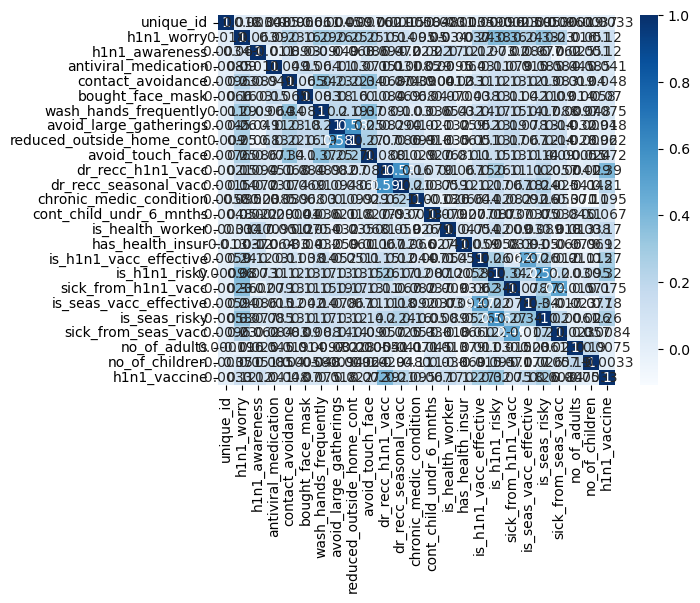

In [8]:
sns.heatmap(correlation_mat,annot=True,cmap="Blues")

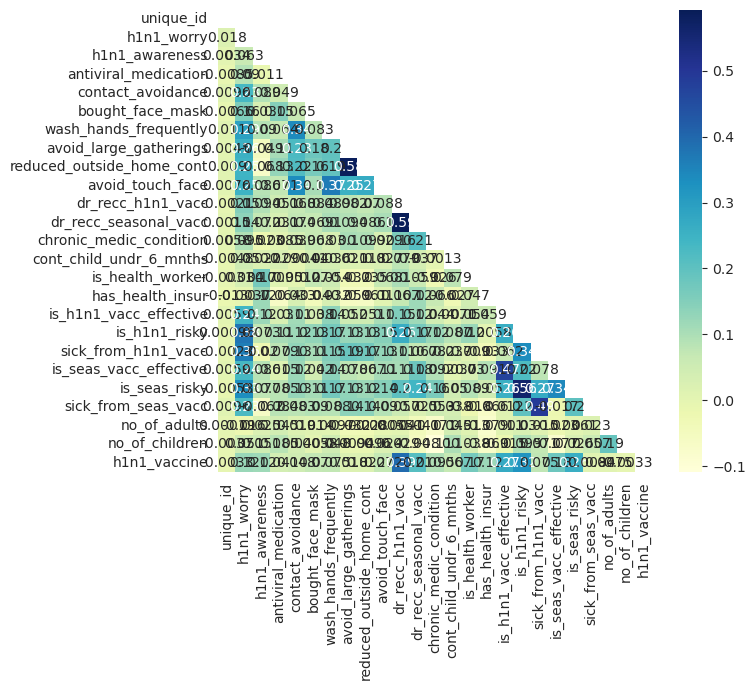

In [9]:
mask = np.zeros_like(correlation_mat)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style("white"):
    f, ax=plt.subplots(figsize=(7,6))
    ax=sns.heatmap(correlation_mat, mask=mask,annot=True,cmap='YlGnBu')

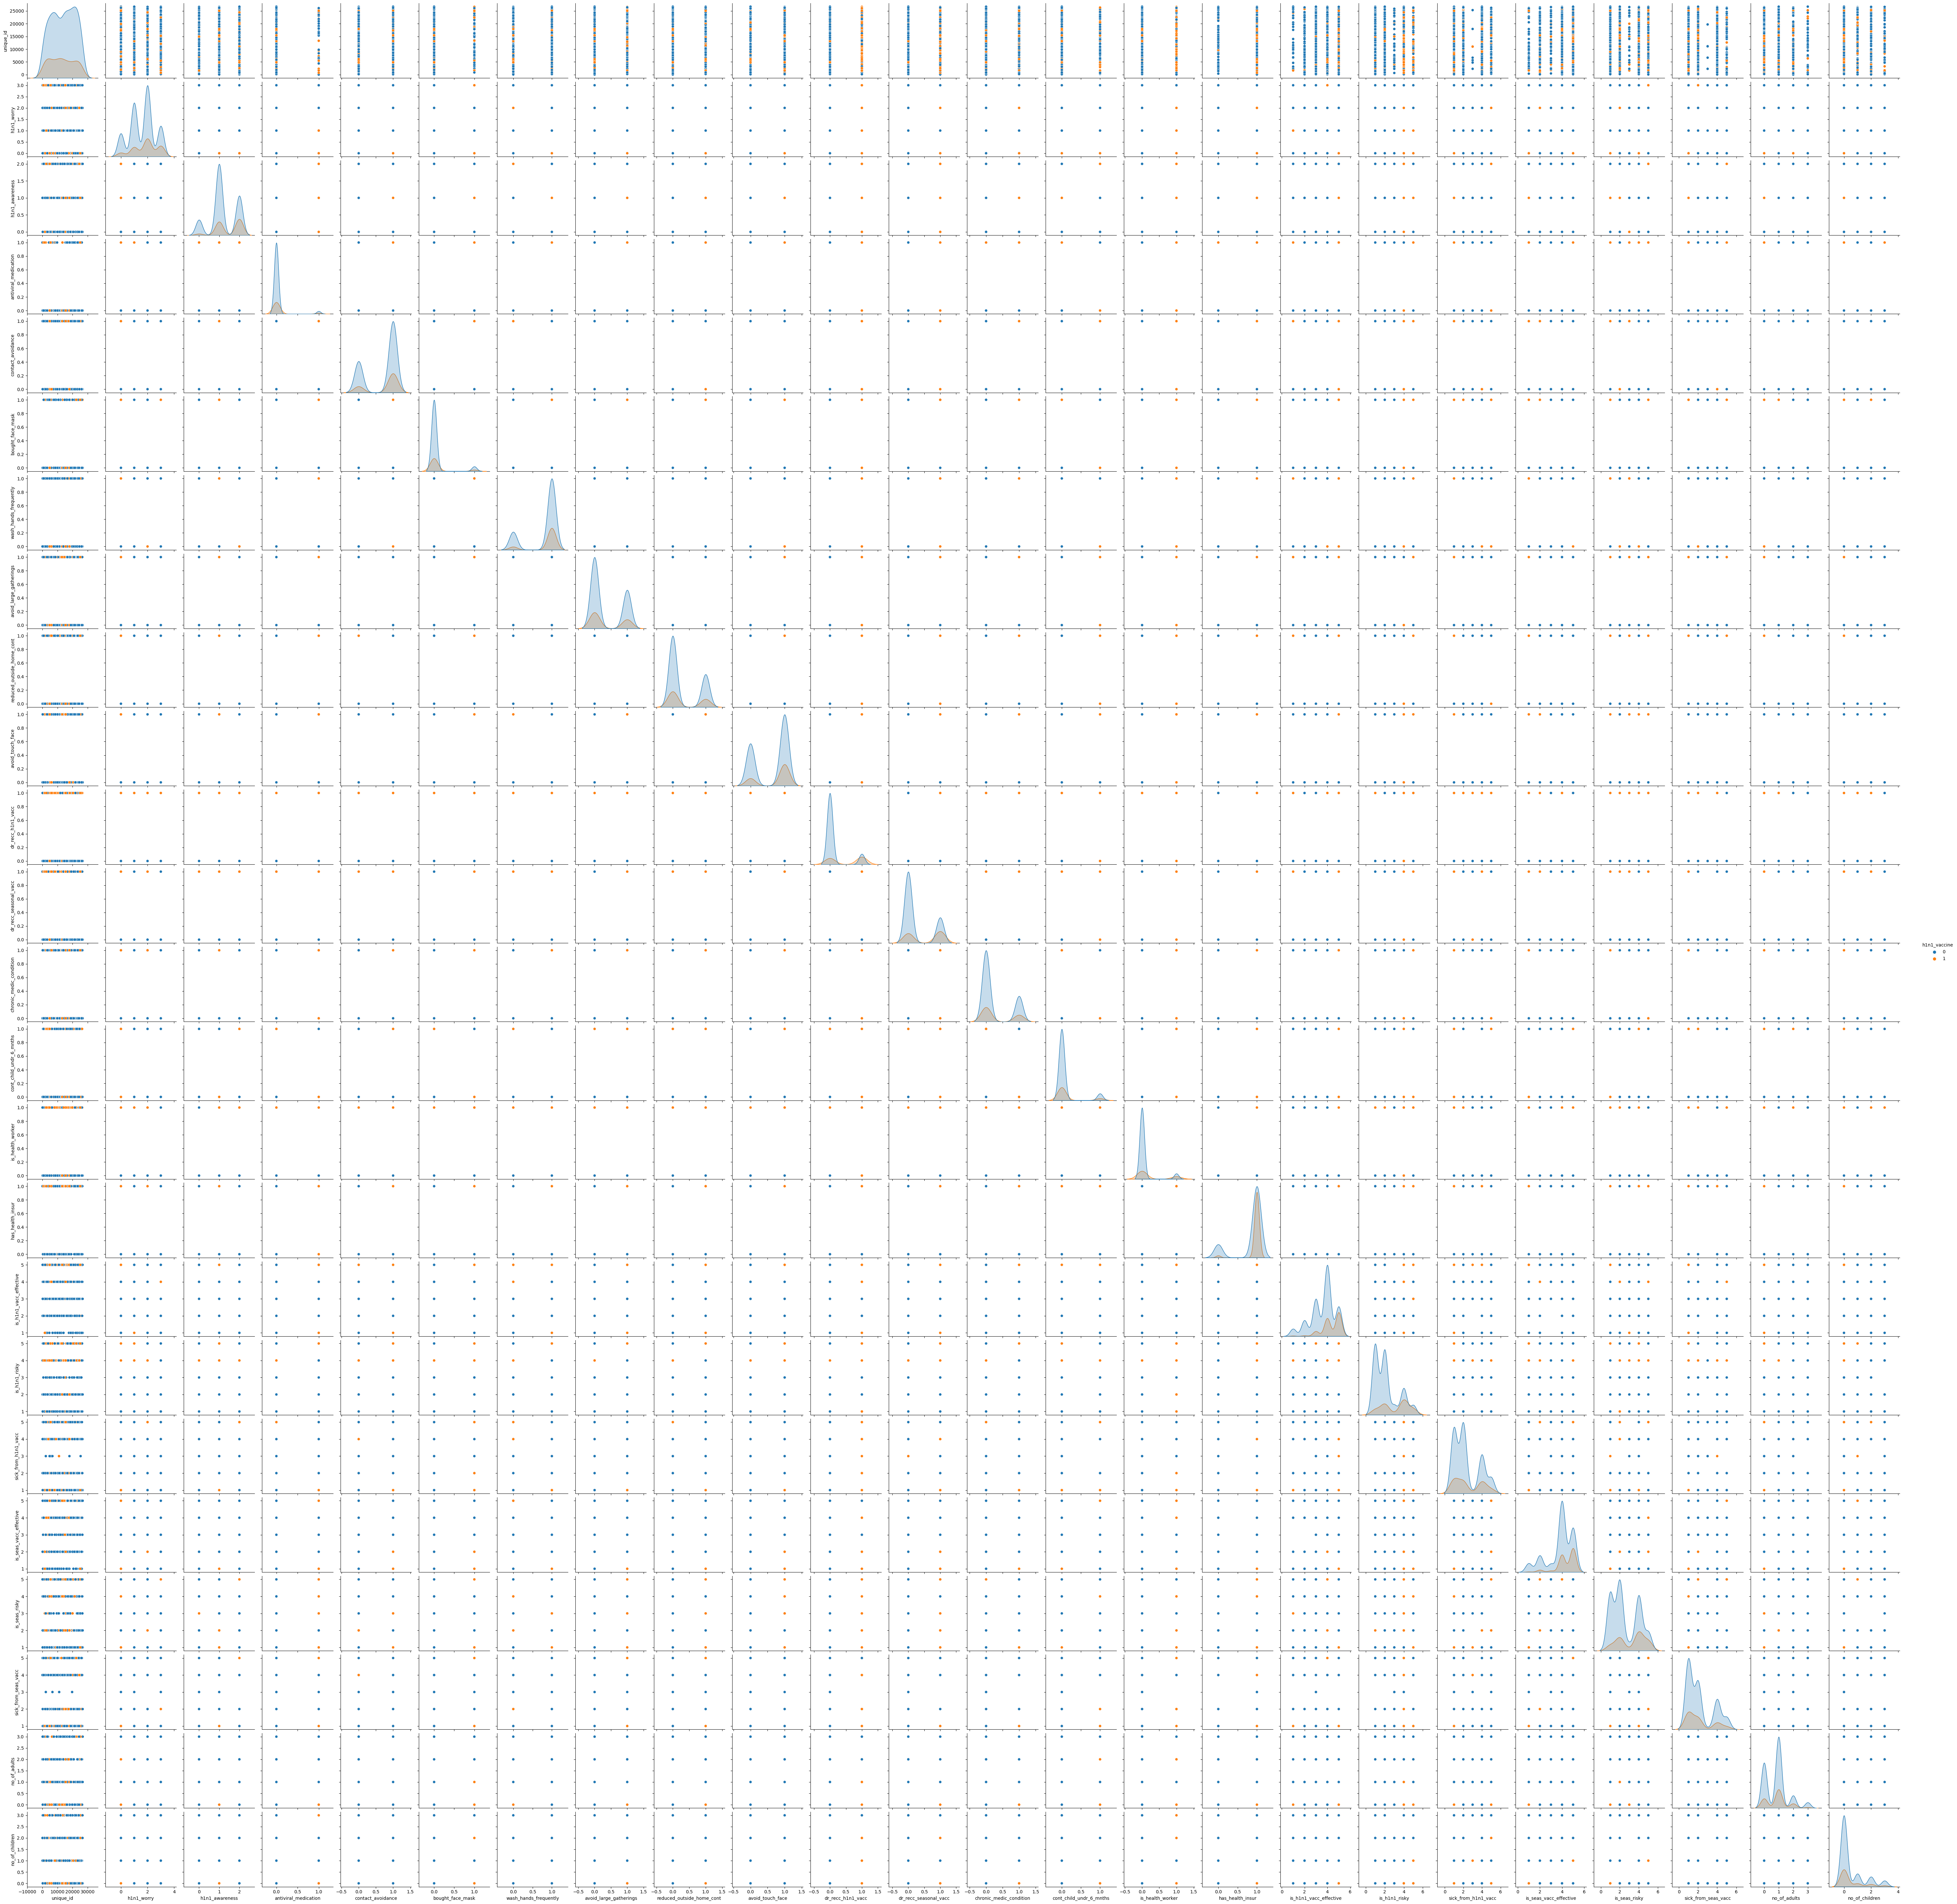

In [10]:
df_subset = df.sample(n=1000)
sns.pairplot(df_subset, hue='h1n1_vaccine')
plt.show()

# Dropping unwanted columns

#### Below is the code where it will compute and will drop weak correlated columns

In [11]:
threshold = 0.2

# Identify columns that are weakly correlated with the target variable
target_column = 'h1n1_vaccine'
weak_corr_columns = set()
for colname in correlation_mat.columns:
    if abs(correlation_mat.loc[target_column, colname]) < threshold and colname != 'unique_id':
        weak_corr_columns.add(colname)

# Drop weakly correlated columns
df= df.drop(columns=weak_corr_columns)

In [12]:
df.head()

unique_id  dr_recc_h1n1_vacc  dr_recc_seasonal_vacc  \
0          0                0.0                    0.0   
1          1                0.0                    0.0   
2          2                NaN                    NaN   
3          3                0.0                    1.0   
4          4                0.0                    0.0   

   is_h1n1_vacc_effective  is_h1n1_risky  is_seas_risky    age_bracket  \
0                     3.0            1.0            1.0  55 - 64 Years   
1                     5.0            4.0            2.0  35 - 44 Years   
2                     3.0            1.0            1.0  18 - 34 Years   
3                     3.0            3.0            4.0      65+ Years   
4                     3.0            3.0            1.0  45 - 54 Years   

      qualification   race     sex               income_level marital_status  \
0        < 12 Years  White  Female              Below Poverty    Not Married   
1          12 Years  White    Male              Below Poverty    Not Married   
2  College Graduate  White    Male  <= $75,000, Above Poverty    Not Married   
3          12 Years  White  Female              Below Poverty    Not Married   
4      Some College  White  Female  <= $75,000, Above Poverty        Married   

  housing_status          employment                census_msa  h1n1_vaccine  
0            Own  Not in Labor Force                   Non-MSA             0  
1           Rent            Employed  MSA, Not Principle  City             0  
2            Own            Employed  MSA, Not Principle  City             0  
3           Rent  Not in Labor Force       MSA, Principle City             0  
4            Own            Employed  MSA, Not Principle  City             0

<AxesSubplot:>

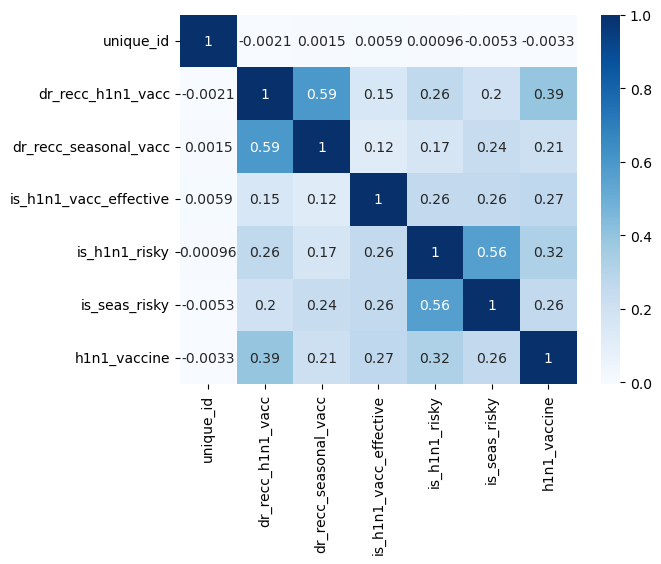

In [13]:
correlation_mat1=df.corr()
sns.heatmap(correlation_mat1,annot=True,cmap="Blues")

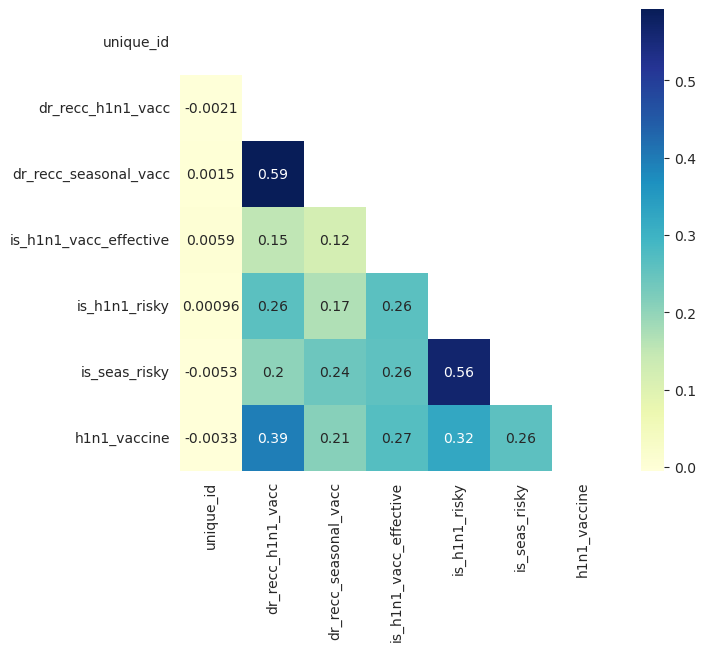

In [14]:
mask = np.zeros_like(correlation_mat1)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style("white"):
    f, ax=plt.subplots(figsize=(7,6))
    ax=sns.heatmap(correlation_mat1, mask=mask,annot=True,cmap='YlGnBu')

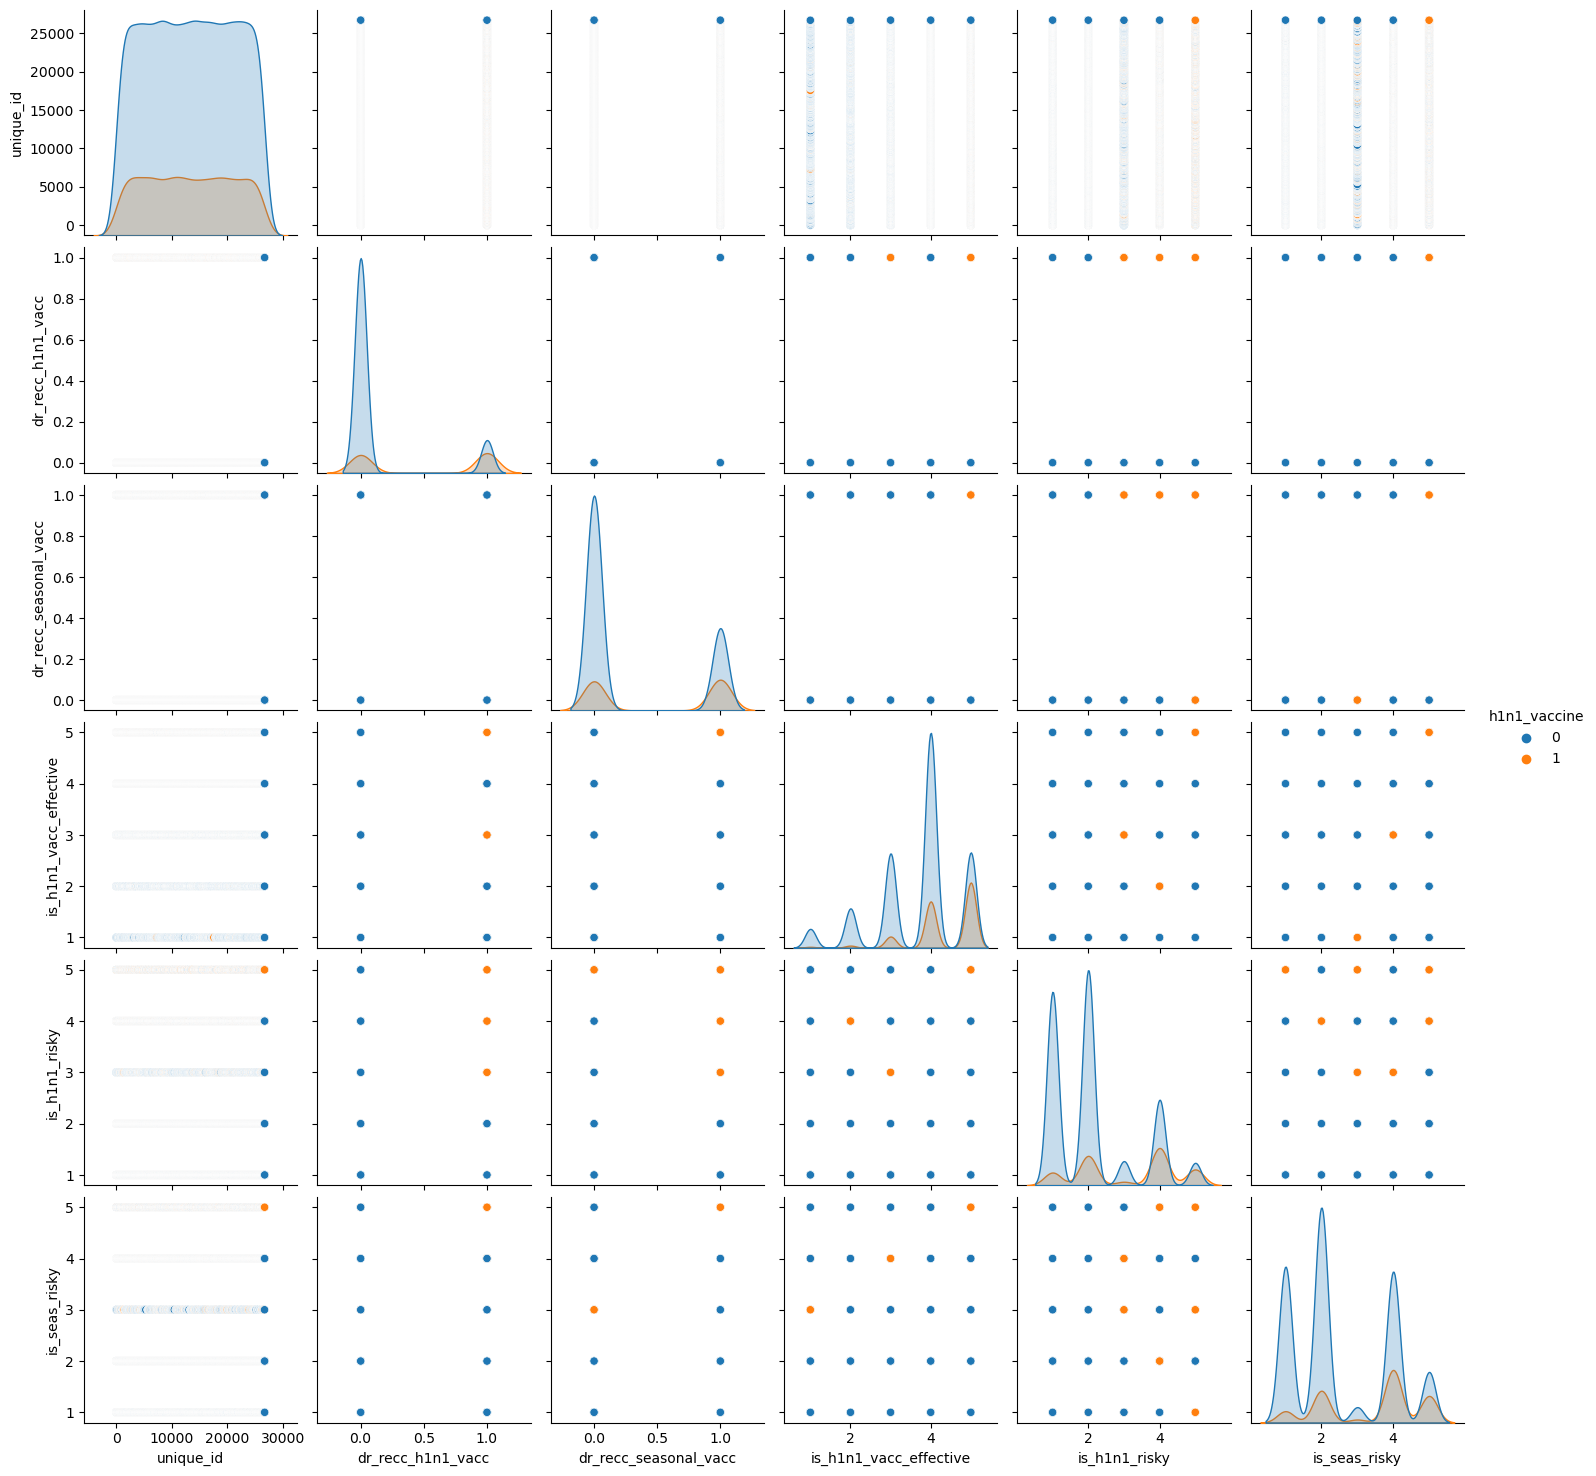

In [15]:
sns.pairplot(df,hue='h1n1_vaccine')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   unique_id               26707 non-null  int64  
 1   dr_recc_h1n1_vacc       24547 non-null  float64
 2   dr_recc_seasonal_vacc   24547 non-null  float64
 3   is_h1n1_vacc_effective  26316 non-null  float64
 4   is_h1n1_risky           26319 non-null  float64
 5   is_seas_risky           26193 non-null  float64
 6   age_bracket             26707 non-null  object 
 7   qualification           25300 non-null  object 
 8   race                    26707 non-null  object 
 9   sex                     26707 non-null  object 
 10  income_level            22284 non-null  object 
 11  marital_status          25299 non-null  object 
 12  housing_status          24665 non-null  object 
 13  employment              25244 non-null  object 
 14  census_msa              26707 non-null

In [17]:
df.describe().style.background_gradient(cmap="rainbow")

# Replacing missing values

In [18]:
df.isnull().sum()

unique_id                    0
dr_recc_h1n1_vacc         2160
dr_recc_seasonal_vacc     2160
is_h1n1_vacc_effective     391
is_h1n1_risky              388
is_seas_risky              514
age_bracket                  0
qualification             1407
race                         0
sex                          0
income_level              4423
marital_status            1408
housing_status            2042
employment                1463
census_msa                   0
h1n1_vaccine                 0
dtype: int64

In [19]:
numeric_features = df.select_dtypes(include= 'number')
numeric_features.columns

Index(['unique_id', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'is_h1n1_vacc_effective', 'is_h1n1_risky', 'is_seas_risky',
       'h1n1_vaccine'],
      dtype='object')

In [20]:
categorical_features = df.select_dtypes(include=[np.object])
categorical_features.columns

Index(['age_bracket', 'qualification', 'race', 'sex', 'income_level',
       'marital_status', 'housing_status', 'employment', 'census_msa'],
      dtype='object')

In [21]:
numeric_missing_cols = ['dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'is_h1n1_vacc_effective', 'is_h1n1_risky', 'is_seas_risky']
median1=df[numeric_missing_cols].median()
df[numeric_missing_cols]=df[numeric_missing_cols].fillna(median1)
#df[numeric_missing_cols].fillna(df[numeric_missing_cols].median(),inplace=True)

In [22]:
df.isnull().sum()

unique_id                    0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
is_seas_risky                0
age_bracket                  0
qualification             1407
race                         0
sex                          0
income_level              4423
marital_status            1408
housing_status            2042
employment                1463
census_msa                   0
h1n1_vaccine                 0
dtype: int64

In [23]:
object_missing_cols = ['qualification', 'income_level',
       'marital_status', 'housing_status', 'employment']
modes=df[object_missing_cols].mode().iloc[0]
df[object_missing_cols]=df[object_missing_cols].fillna(modes)
#df[object_missing_cols].fillna(df[object_missing_cols].median().values[0])

In [24]:
df.isnull().sum()

unique_id                 0
dr_recc_h1n1_vacc         0
dr_recc_seasonal_vacc     0
is_h1n1_vacc_effective    0
is_h1n1_risky             0
is_seas_risky             0
age_bracket               0
qualification             0
race                      0
sex                       0
income_level              0
marital_status            0
housing_status            0
employment                0
census_msa                0
h1n1_vaccine              0
dtype: int64

# Checking for outlier

<AxesSubplot:xlabel='dr_recc_h1n1_vacc'>

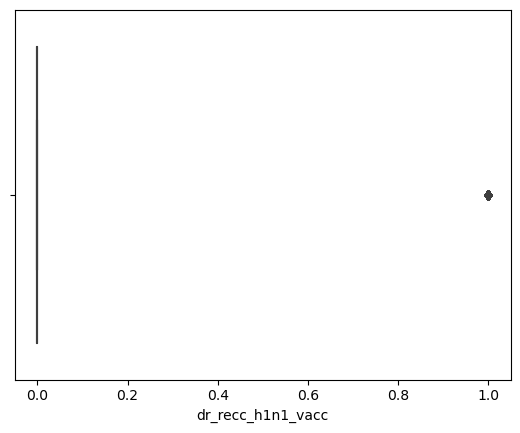

In [25]:
sns.boxplot(x="dr_recc_h1n1_vacc",data=df)

<AxesSubplot:xlabel='dr_recc_seasonal_vacc'>

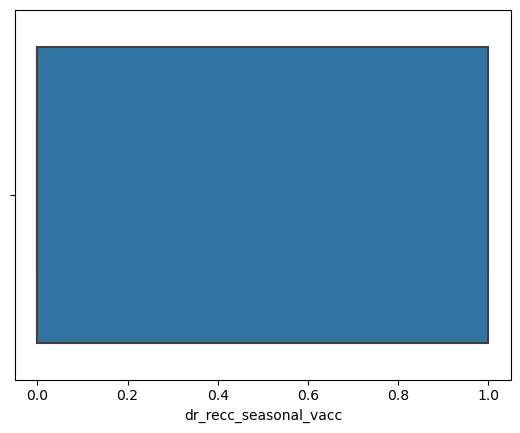

In [26]:
sns.boxplot(x="dr_recc_seasonal_vacc",data=df)

<AxesSubplot:xlabel='is_h1n1_vacc_effective'>

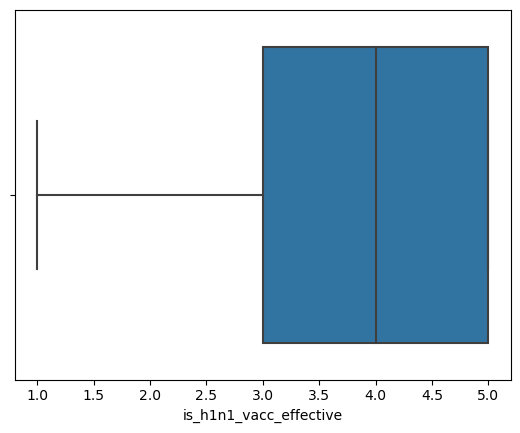

In [27]:
sns.boxplot(x="is_h1n1_vacc_effective",data=df)

<AxesSubplot:xlabel='is_h1n1_risky'>

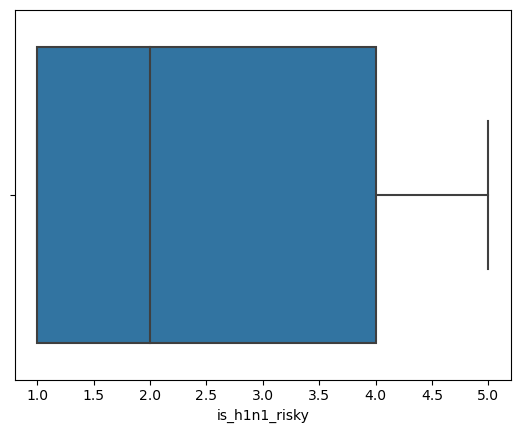

In [28]:
sns.boxplot(x="is_h1n1_risky",data=df)

<AxesSubplot:xlabel='is_seas_risky'>

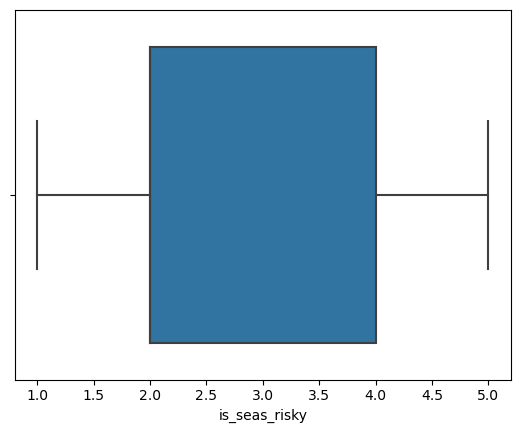

In [29]:
sns.boxplot(x="is_seas_risky",data=df)

In [30]:
df=pd.get_dummies(df,columns=['age_bracket', 'qualification', 'race', 'sex', 'income_level',
       'marital_status', 'housing_status', 'employment', 'census_msa'])

In [31]:
df.head()

unique_id  dr_recc_h1n1_vacc  dr_recc_seasonal_vacc  \
0          0                0.0                    0.0   
1          1                0.0                    0.0   
2          2                0.0                    0.0   
3          3                0.0                    1.0   
4          4                0.0                    0.0   

   is_h1n1_vacc_effective  is_h1n1_risky  is_seas_risky  h1n1_vaccine  \
0                     3.0            1.0            1.0             0   
1                     5.0            4.0            2.0             0   
2                     3.0            1.0            1.0             0   
3                     3.0            3.0            4.0             0   
4                     3.0            3.0            1.0             0   

   age_bracket_18 - 34 Years  age_bracket_35 - 44 Years  \
0                          0                          0   
1                          0                          1   
2                          1                          0   
3                          0                          0   
4                          0                          0   

   age_bracket_45 - 54 Years  age_bracket_55 - 64 Years  \
0                          0                          1   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          1                          0   

   age_bracket_65+ Years  qualification_12 Years  qualification_< 12 Years  \
0                      0                       0                         1   
1                      0                       1                         0   
2                      0                       0                         0   
3                      1                       1                         0   
4                      0                       0                         0   

   qualification_College Graduate  qualification_Some College  race_Black  \
0                               0                           0           0   
1                               0                           0           0   
2                               1                           0           0   
3                               0                           0           0   
4                               0                           1           0   

   race_Hispanic  race_Other or Multiple  race_White  sex_Female  sex_Male  \
0              0                       0           1           1         0   
1              0                       0           1           0         1   
2              0                       0           1           0         1   
3              0                       0           1           1         0   
4              0                       0           1           1         0   

   income_level_<= $75,000, Above Poverty  income_level_> $75,000  \
0                                       0                       0   
1                                       0                       0   
2                                       1                       0   
3                                       0                       0   
4                                       1                       0   

   income_level_Below Poverty  marital_status_Married  \
0                           1                       0   
1                           1                       0   
2                           0                       0   
3                           1                       0   
4                           0                       1   

   marital_status_Not Married  housing_status_Own  housing_status_Rent  \
0                           1                   1                    0   
1                           1                   0                    1   
2                           1                   1                    0   
3                           1                   0 

# above is boxplot of all numeric features and there are no outliers

#   

# Model Building

In [32]:
Y=df[['h1n1_vaccine']]
X=df.drop(['h1n1_vaccine'], axis=1)

In [33]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=1)

In [34]:
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier(max_depth=3)),
    ('Bagging', BaggingClassifier(max_features=3)),
    ('AdaBoost', AdaBoostClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('Random Forest', RandomForestClassifier(max_depth=3)),
    ('SVC', SVC())
]

In [35]:
for name, model in models:
    model.fit(X_train, Y_train)
    print(model)
    print('------------------------------------------------------')
    print(f'{name} accuracy for train: {model.score(X_train, Y_train)}')
    print(f'{name} accuracy for test: {model.score(X_test, Y_test)}')
    print('------------------------------------------------------')
    print('\n')

LogisticRegression()
------------------------------------------------------
Logistic Regression accuracy for train: 0.8171070931849791
Logistic Regression accuracy for test: 0.8216647947085985
------------------------------------------------------


DecisionTreeClassifier(max_depth=3)
------------------------------------------------------
Decision Tree accuracy for train: 0.8221889376270461
Decision Tree accuracy for test: 0.8299014102084113
------------------------------------------------------


BaggingClassifier(max_features=3)
------------------------------------------------------
Bagging accuracy for train: 0.786509040333797
Bagging accuracy for test: 0.7899663047547735
------------------------------------------------------


AdaBoostClassifier()
------------------------------------------------------
AdaBoost accuracy for train: 0.8256124959880176
AdaBoost accuracy for test: 0.832272557094721
------------------------------------------------------


GradientBoostingClassifier()
---

In [36]:
predictions = []
for name, model in models:
    prediction = model.predict(X_test)
    cm = metrics.confusion_matrix(Y_test, prediction, labels=[1,0])
    #cm = pd.DataFrame(cm, index =[i for i in ['1','0']], columns = [i for i in ['Vaccinated', 'Not Vaccinated']])
    predictions.append((name, prediction, cm))

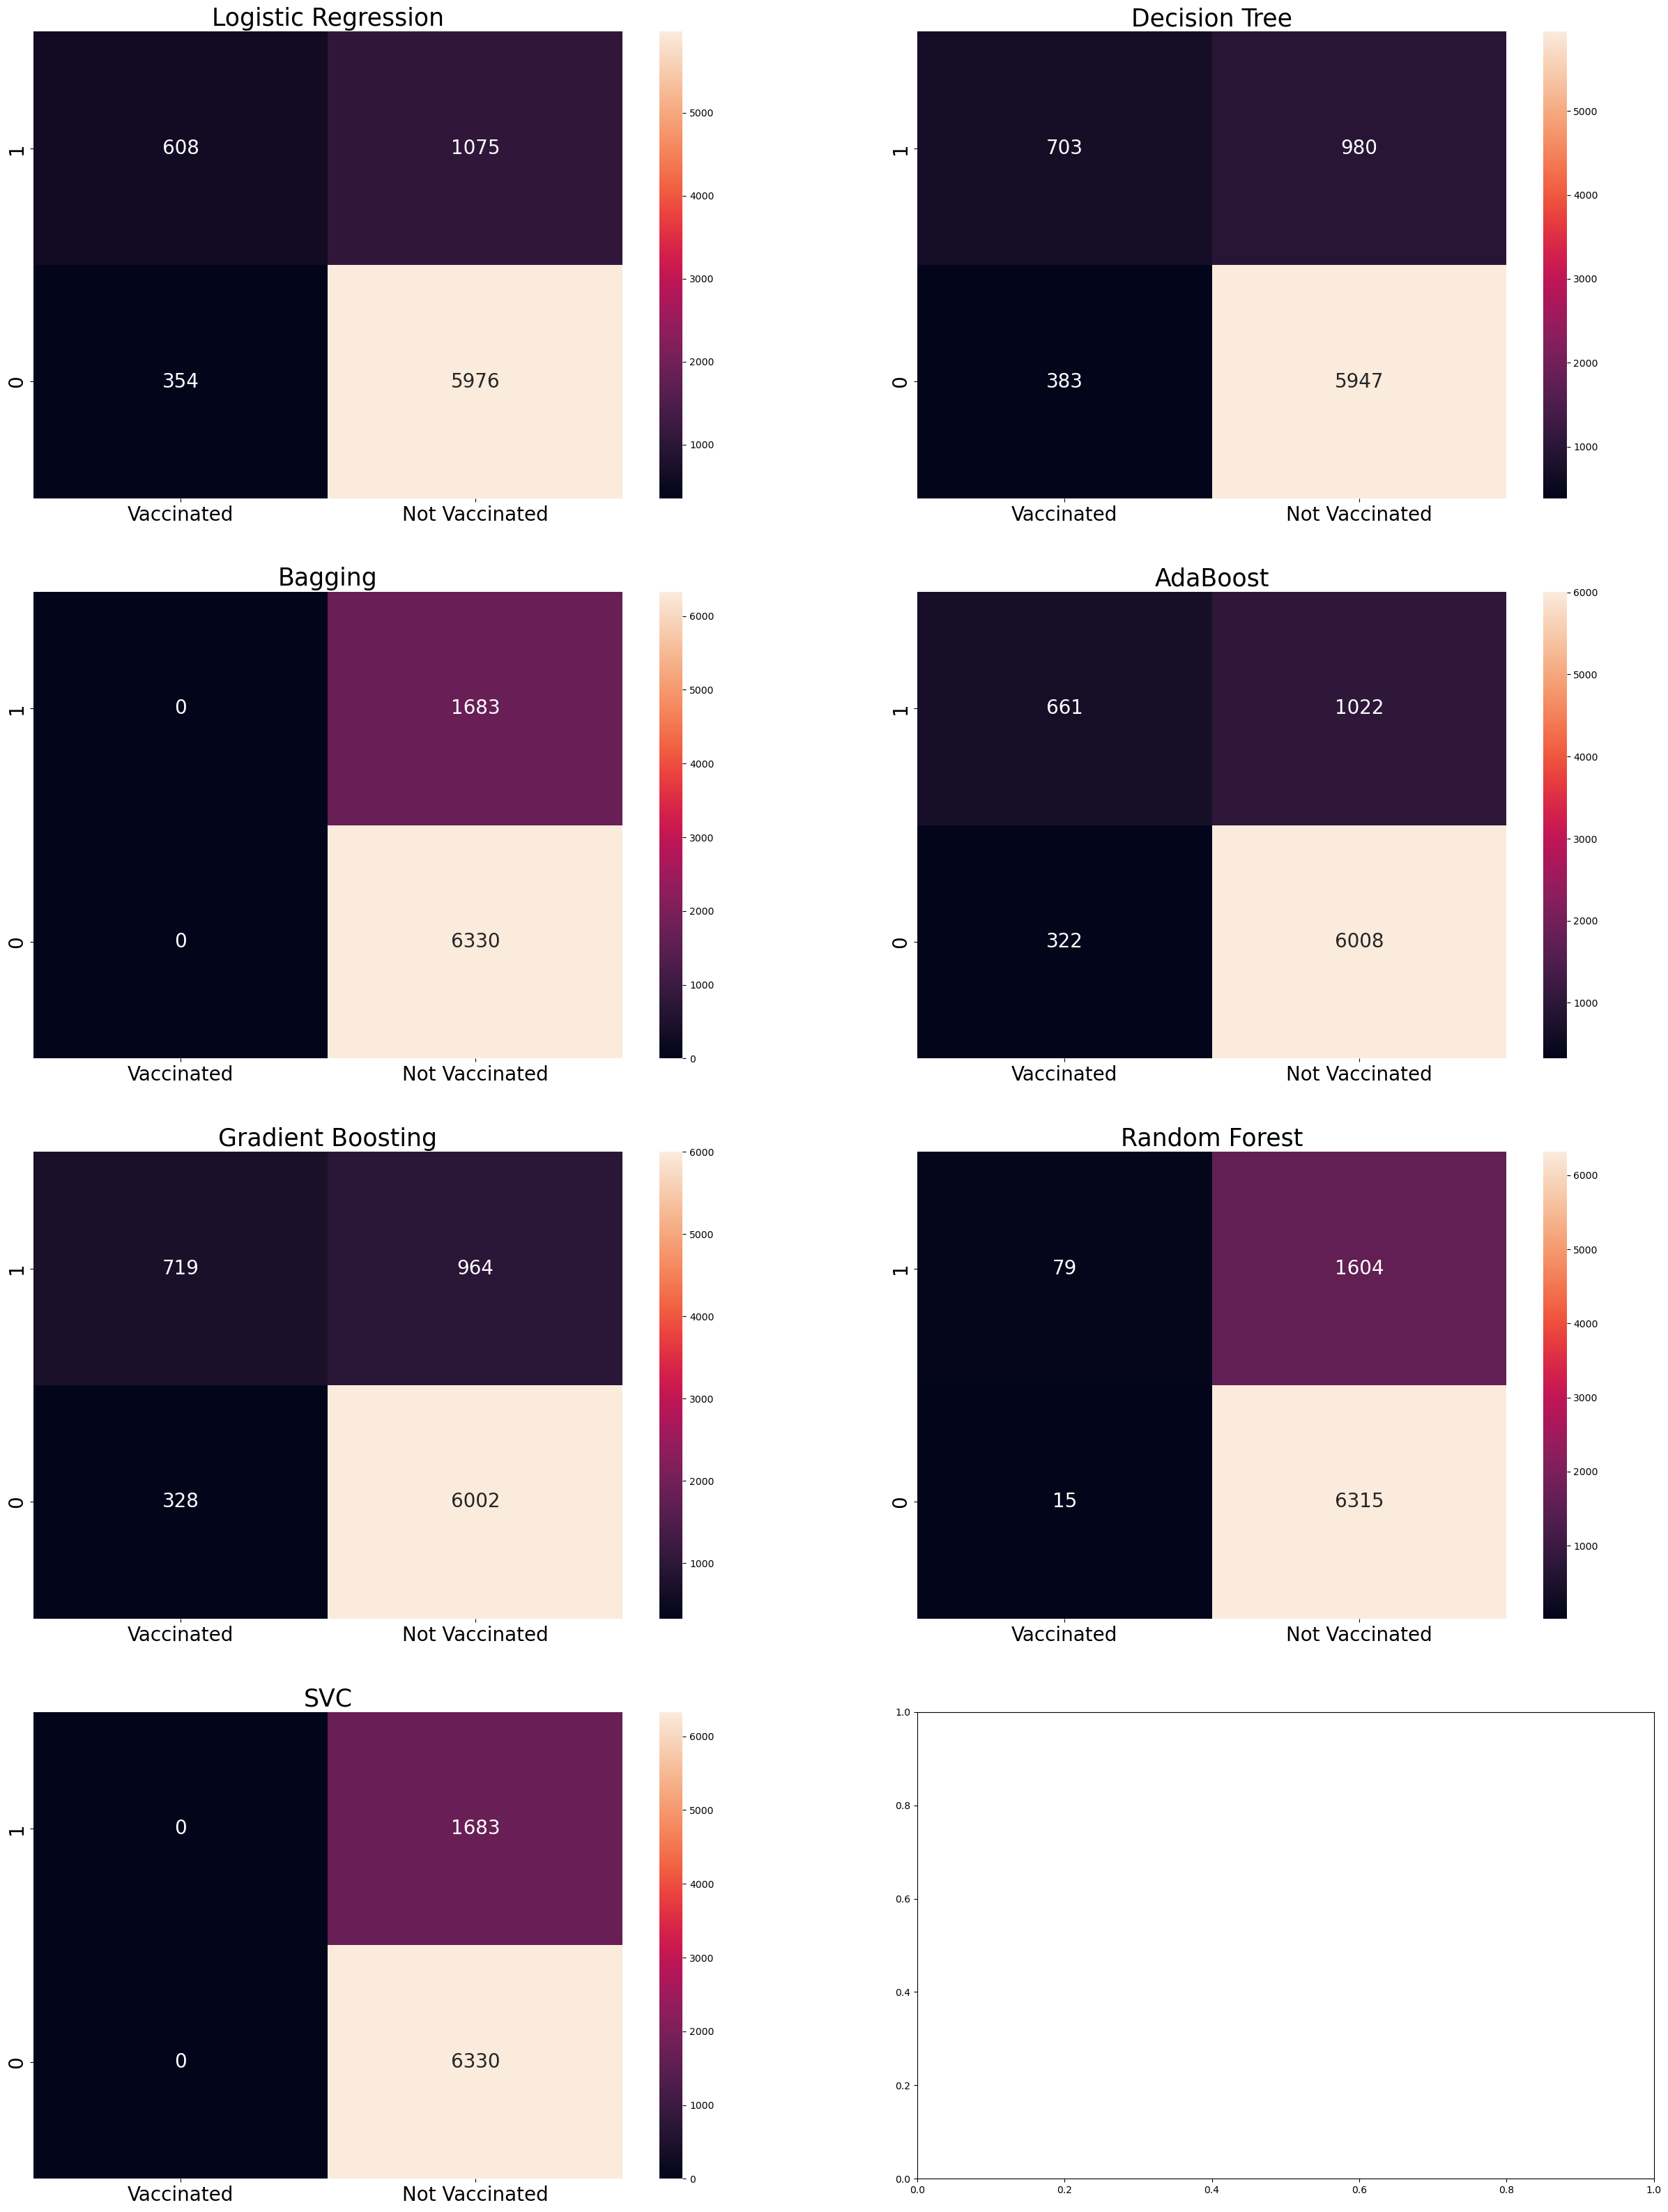

In [37]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(30,40))
for i, (name, prediction, cm) in enumerate(predictions):
    sns.heatmap(cm, annot=True, fmt='g', ax=axs[i//2, i%2], annot_kws={'fontsize':20},xticklabels=['Vaccinated', 'Not Vaccinated'], yticklabels=['1', '0'])
    axs[i//2, i%2].set_title(name, fontsize=25)
    axs[i//2, i%2].xaxis.set_ticklabels(['Vaccinated', 'Not Vaccinated'], fontsize=20)
    axs[i//2, i%2].yaxis.set_ticklabels(['1', '0'], fontsize=20)
plt.show()

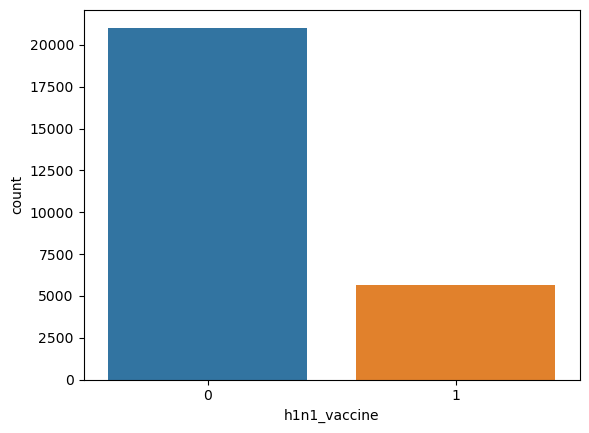

In [38]:
sns.countplot(x='h1n1_vaccine',data=df)
plt.show()